In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [5]:
filename = "Trading with Mexico.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])



the project gutenberg ebook of trading with mexico
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: trading with mexico

author: wallace thompson

release date: february 26, 2025 [ebook #75469]

language: english

original publication: new york: dodd, mead and company, 1921

credits: the online distributed proofreading team at https://www.pgdp.net (this file was produced from images generously made available by the internet archive)


*** start of the project gutenberg ebook trading with mexico ***





                              trading with
                                 mexico



In [6]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())
chars =  sorted(list(set(raw_text)))

In [7]:
char_to_int = dict((c,i) for i, c in enumerate(chars))
int_to_char = dict((i,c) for i, c in enumerate(chars))

In [8]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length:", n_chars)
print("Total Vocab", n_vocab)

Total Characters in the text; corpus length: 387019
Total Vocab 63


In [9]:
seq_length = 60
step = 10
sentences =[]
next_chars = []

for i in range(0, n_chars -seq_length, step):
    sentences.append(raw_text[i: i + seq_length])
    next_chars.append(raw_text[i + seq_length])

n_patterns = len(sentences)
print('Number of sequences:', n_patterns)

Number of sequences: 38696


In [13]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool_)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)
print(y[0:10])

(38696, 60, 63)
(38696, 63)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False Fals

In [14]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

2025-09-14 02:36:55.501117: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        98,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,431 (415.75 KB)

 Trainable params: 106,431 (415.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.callbacks import ModelCheckpoint

filepath = "save_weights-{epoch:02d}-{loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [19]:
history = model.fit(x, y,
                    batch_size=128,
                    epochs=50,
                    callbacks=callbacks_list)

model.save('my_saved_weights_50epochs.keras')

Epoch 1/50


2025-09-14 02:41:26.050299: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 146270880 exceeds 10% of free system memory.


302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.7867
Epoch 1: loss improved from None to 2.48038, saving model to save_weights-01-2.4804.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - loss: 2.4804
Epoch 2/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.0835
Epoch 2: loss improved from 2.48038 to 2.03087, saving model to save_weights-02-2.0309.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - loss: 2.0309
Epoch 3/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.8703
Epoch 3: loss improved from 2.03087 to 1.84926, saving model to save_weights-03-1.8493.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - loss: 1.8493
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.7217
Epoch 4: loss improved from 1.84926 to 1.71422, saving model to save_weights-04-1.7142.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - loss: 1.7142
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.5829
Epoch 5: loss improved from 1.71422 to 1.60307, saving model to save_w

<function matplotlib.pyplot.show(close=None, block=None)>

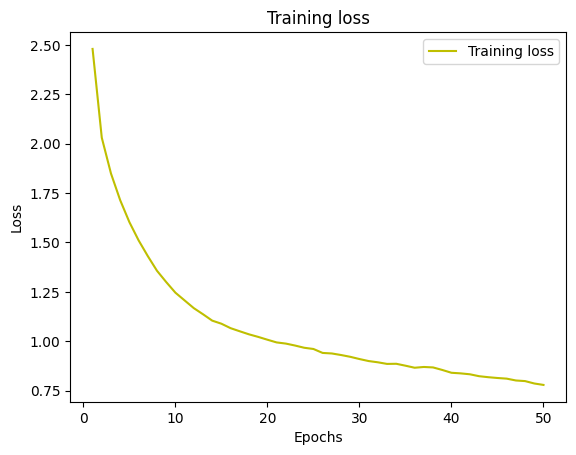

In [22]:
from matplotlib import pyplot as plt

loss =  history.history['loss']
epochs =  range(1, len(loss) +1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [30]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [31]:
filename = "save_weights-50-0.7783.keras"
model.load_weights(filename)

start_index = random.randint(0, n_chars - seq_length - 1)

generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
sys.stdout.write(generated)

----- Seed for our text prediction: "o were too willing to let the misery
of mexico be what it wa"
o were too willing to let the misery
of mexico be what it wa

60

In [32]:
for i in range(400):  # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()

print()

d

 tho great bend it is counder of littation and such only largel even the property in the mexican social fine, closed those is uppout
project must buitidlers, and this has evicturs dosk and paoficied which im now edutal_ for strang is
impasis was natter the great butancial state
in bailth-awill, put clains breat. the strum_. and land of $,aunes, for done has fee companies and drawned the firs-or r
